In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Data Files/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

sX = sx.fit_transform(df.drop('price', axis='columns'))
sY = sy.fit_transform(df.price.values.reshape(df.shape[0], 1))

sX

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [19]:
# dealing all samples per epoch

def batch_gradient_descent(X, y, epochs, rate = 0.01):
    nFeatures = X.shape[1] # 2
    
    w = np.ones(shape=(nFeatures))
    b = 0
    nSamples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_hat = np.dot(w, sX.T) + b # y predicted

        wd = -(2/nSamples)*(X.T.dot(y-y_hat)) # weight gradient
        bd = -(2/nSamples)*np.sum(y-y_hat) # bias gradient

        w = w - rate * wd
        b = b - rate * bd

        cost = np.mean(np.square(y-y_hat)) # mean squared error

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(sX, sY.reshape(sY.shape[0],), epochs=500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

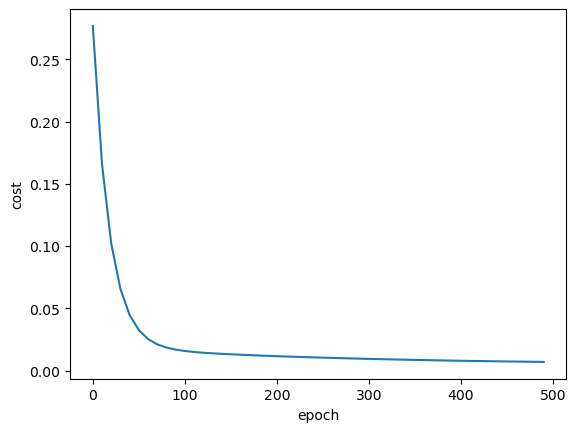

In [21]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [23]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]
    
predict(2600, 4, w, b)

C:\Users\games\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [24]:
predict(1000, 2, w, b)

C:\Users\games\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [25]:
import random

In [32]:
# dealing with one random sample per epoch

def stochastic_gradient_descent(X, y, epochs, rate = 0.01):
    nFeatures = X.shape[1] # 2
    
    w = np.ones(shape=(nFeatures))
    b = 0
    nSamples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, nSamples-1)
        sample_x = X[random_index]
        sample_y = y[random_index]
        
        y_hat = np.dot(w, sample_x.T) + b
        
        wd = -(2/nSamples)*(sample_x.T.dot(sample_y-y_hat)) # weight gradient
        bd = -(2/nSamples)*np.sum(sample_y-y_hat) # bias gradient

        w = w - rate * wd
        b = b - rate * bd

        cost = np.mean(np.square(sample_y-y_hat)) # mean squared error

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(sX, sY.reshape(sY.shape[0],), epochs=10000)
w_sgd, b_sgd, cost_sgd

(array([0.70416538, 0.67349942]), -0.22599325950104712, 0.00286833920987978)

In [33]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

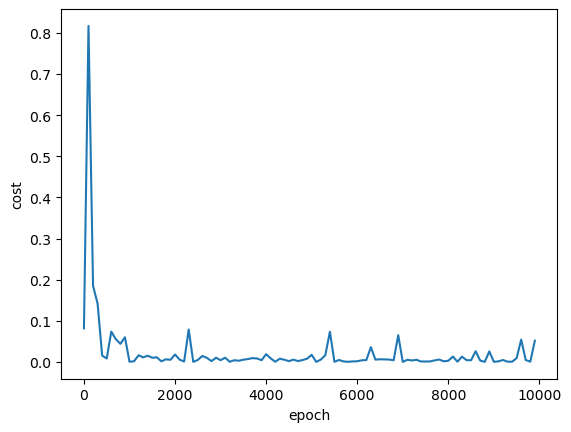

In [34]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [44]:
# dealing with multiple random samples per epoch

def mini_batch_gradient_descent(X, y, epochs, rate = 0.01, batch_size=10):
    nFeatures = X.shape[1] # 2
    
    w = np.ones(shape=(nFeatures))
    b = 0
    nSamples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    if (batch_size >= nSamples):
        print("Batch too large!")
        return
    
    for i in range(epochs):
        random_index = random.randint(0, nSamples-(batch_size+1))
        sample_x = X[random_index:random_index+batch_size]
        sample_y = y[random_index:random_index+batch_size]
        
        y_hat = np.dot(w, sample_x.T) + b
        
        wd = -(2/nSamples)*(sample_x.T.dot(sample_y-y_hat)) # weight gradient
        bd = -(2/nSamples)*np.sum(sample_y-y_hat) # bias gradient

        w = w - rate * wd
        b = b - rate * bd

        cost = np.mean(np.square(sample_y-y_hat)) # mean squared error

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = mini_batch_gradient_descent(sX, sY.reshape(sY.shape[0],), epochs=1000)
w_mb, b_mb, cost_mb

(array([0.8718001, 0.8435964]), -0.24924651594470493, 0.0005149238125651635)